In [2]:
#Imports

import numpy as np
import sympy as sp
from sympy import init_printing
from sympy import *
from sympy import Matrix, symbols, solve_linear_system
from sympy.interactive import printing
from sympy.printing.latex import LatexPrinter, print_latex
from sympy import Eq
printing.init_printing(use_latex=True)

In [3]:
#Data

E=float(input("E=")) #GPa (40)
a=float(input("a=")) #mm (220)
b=float(input("b=")) #mm (540)
c=float(input("c=")) #mm (730)
d=float(input("d=")) #mm (27)
p_1=float(input("p_1=")) #N/m (-3000)
F_1=float(input("F_1=")) #kN (-1)
M_1=float(input("M_1=")) #kNm (-1.1)

#Change to SI

E=E*10**9
a=a/1000
b=b/1000
c=c/1000
d=d/1000
F_1=F_1*1000
M_1=M_1*1000

In [4]:
#Rudak hossza

print("A rudak hosszai:")

L_1=a
print("\nL_1=",L_1*1000,"[mm]")

L_2=b-a
print("L_2=",L_2*1000,"[mm]")

L_3=c-b
print("L_3=",L_3*1000,"[mm]")

#Rudak keresztmetszete

print("\nA rudak keresztmetszetei")

A_1=d**2*np.pi/4
print("\nA_1=",A_1,"[m^2]")

A_2=(2*d)**2*np.pi/4
print("A_2=",A_2,"[m^2]")

A_3=A_2
print("A_3=",A_3,"[m^2]")

print("\nA rudak másodrendű nyomatékai")

Iz_1=d**4*np.pi/64
print("\nIz_1=",Iz_1,"[m^4]")

Iz_2=(2*d)**4*np.pi/64
print("Iz_2=",Iz_2,"[m^4]")

Iz_3=Iz_2
print("Iz_3=",Iz_3,"[m^4]")

#Rudak rugalmassagi modulusai

E_1=4*E
E_2=E
E_3=E

A rudak hosszai:

L_1= 220.0 [mm]
L_2= 320.00000000000006 [mm]
L_3= 189.99999999999994 [mm]

A rudak keresztmetszetei

A_1= 0.0005725552611167398 [m^2]
A_2= 0.002290221044466959 [m^2]
A_3= 0.002290221044466959 [m^2]

A rudak másodrendű nyomatékai

Iz_1= 2.6087049084631455e-08 [m^4]
Iz_2= 4.173927853541033e-07 [m^4]
Iz_3= 4.173927853541033e-07 [m^4]


Merevségi mátrixok:

K_ 1 =


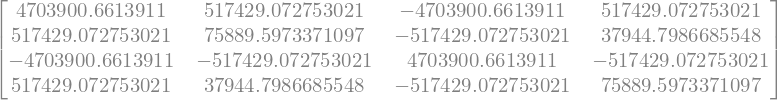


K_ 2 =


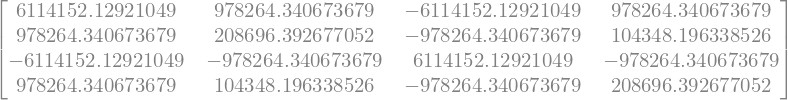


K_ 3 =


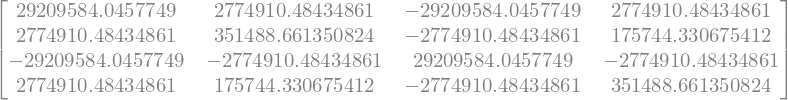

In [5]:
#Merevsegi matrixok meghatarozasa

print("Merevségi mátrixok:")

def K_matrix(Iz,Ei,L):
    K=Iz*Ei/(L**3)*sp.Matrix([[12,6*L,-12,6*L],
                              [6*L,4*L**2,-6*L,2*L**2],
                              [-12,-6*L,12,-6*L],
                              [6*L,2*L**2,-6*L,4*L**2]])
    return K

#Printing 

n=3
i=0
L_array=[L_1,L_2,L_3]
Iz_array=[Iz_1,Iz_2,Iz_3]
E_array=[E_1,E_2,E_3]
K_array=[0,0,0]
for i in range(n):
    K_array[i]=K_matrix(Iz_array[i],E_array[i],L_array[i])
    print("\nK_",i+1,"=")
    display(K_array[i])
    i=i+1

Globális merevségi mátrix:
K_glob=


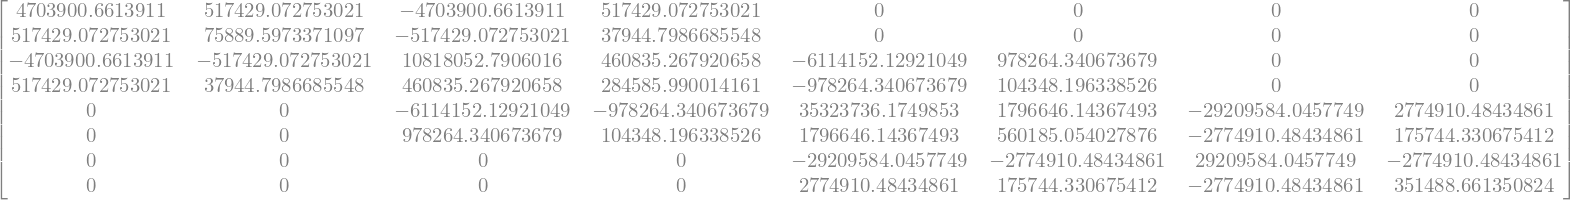

In [31]:
#Globalis merevsegi matrix

print("Globális merevségi mátrix:")

#Elem-csomopont osszerendeles

ecs = sp.Matrix([[1,2],[2,3],[3,4]])

eDOF1 = [2*ecs[0,0]-1, 2*ecs[0,0], 2*ecs[0,1]-1, 2*ecs[0,1]]
eDOF2 = [2*ecs[1,0]-1, 2*ecs[1,0], 2*ecs[1,1]-1, 2*ecs[1,1]]
eDOF3 = [2*ecs[2,0]-1, 2*ecs[2,0], 2*ecs[2,1]-1, 2*ecs[2,1]]

def ExtMatrix(mx, rows, size):
    n = len(rows)
    Mx = np.zeros((size,size))
    for i in range(n):
        for j in range(n):
            Mx[rows[i]-1,rows[j]-1] = mx[i,j]
    return Mx

K_glob = ExtMatrix(K_matrix(Iz_1,E_1,L_1), eDOF1, 8) + ExtMatrix(K_matrix(Iz_2,E_2,L_2), eDOF2, 8) + ExtMatrix(K_matrix(Iz_3,E_3,L_3), eDOF3, 8)

print("K_glob=")
display(sp.Matrix(K_glob))